#### Import Package Dependencies

In [1]:
import os, sys, re
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
import warnings
warnings.filterwarnings('ignore')
# display options
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)

#### Table Relations

<img src="table_relation.png" width="800">

#### Import Dataset Tables

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
category_name = pd.read_csv('product_category_name_translation.csv')

#### Inspect Tables:


https://www.kaggle.com/code/claire0577/olist-data-preprocessing

In [3]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [5]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [7]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Pá...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super recomendo essa loja!",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [8]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [9]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [10]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [11]:
category_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


#### Helpful User-defined Function

In [12]:
# primary key validation function   
def keyValidation(data, key):
    result = data.duplicated(subset=key)
    if result.any():
        print(f"Attention: The primary key is not unique.")
        return data[result]
    else:
        print(f"{result}: No duplicate values found, the primary key is unique.")

In [13]:
# numeric data distribution plot
def normalDistribution(number_data): # data input
    fig = plt.figure(figsize=(20,16))

    for idx in range(number_data.shape[1]): # iter every numeric column
        ax = fig.add_subplot(7,5, (idx+1))  # preset plots quantity
        sns.histplot(data=number_data.iloc[:,idx], 
                    color='steelblue', bins=50,
                    stat='density', edgecolor=None)
        ax.set_title(number_data.columns[idx], fontsize=12)
        plt.gcf().subplots_adjust(hspace=1)

    plt.show()

In [14]:
# outliers validation on numeric data 
def numberOutliers(number_data):
    
    fig = plt.figure(figsize=(20, 16))  

    for idx in range(number_data.shape[1]):
        ax = fig.add_subplot(6,2, (idx+1))
        sns.boxplot(data=number_data.iloc[:,idx],
                    palette='Set2')  
        ax.set_title(number_data.columns[idx], fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [15]:
def categoryOutliers(data,select_columns, index_col): 
    if isinstance(data, pd.DataFrame):
        category_data = data[select_columns]
        pivot_ = category_data.pivot_table(index=index_col,aggfunc='nunique')
        pivot_ = pivot_.sort_values(by=pivot_.columns.tolist(), ascending=False) 
        return pivot_

In [16]:
def dateOutliers(data,key): 
    
    if isinstance(data, pd.DataFrame): 
        for col in data[key]: ### 2018-03-01 02:50:48
            data[col] = pd.to_datetime(data[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')  # transform input to datetime type，and transform non-valid date into NaT(not a time)
            print(f'{col} min: {data[col].min()}') 
            print(f'{col} max: {data[col].max()}') 
        return data[data.isna().any(axis=1)] # return rows that contains nan
    else: 
        print('Input is not a dataframe.')
        return None

In [17]:
# text cleaning function
def clean_text(text):
  
    text = re.sub(r'ç', 'c', text)  
    text = re.sub(r'[áãâ]', 'a', text)  
    text = re.sub(r'[éê]', 'e', text) 
    text = re.sub(r'[í]', 'i', text)  
    text = re.sub(r'[óõô]', 'o', text)  
    text = re.sub(r'[úü]', 'u', text)  
    text = re.sub(r'\'', ' ', text) 

    # only retain letters from a-z and spaces between letters, also remove spaces at the beginning and end of the string
    text = re.sub(r'[^a-z\s]', '', text)  # remove non-(letter and space) characters
    text = text.strip()  # remove spaces at the beginning and end of the string

    return text

#### 1. Customers Dataset

In [18]:
print(customers.shape) 
print('----------')
print(customers.dtypes)
print('----------')
keyValidation(customers,'customer_id') # customer table primary key validation

(99441, 5)
----------
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
----------
0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Length: 99441, dtype: bool: No duplicate values found, the primary key is unique.


In [19]:
# check if zip_code_prefix, city, state are one-to-one relationship
categoryOutliers(customers,['customer_zip_code_prefix','customer_city', 'customer_state'],
                 ['customer_zip_code_prefix']).sort_values(by=['customer_city'], ascending=False)

,customer_city,customer_state
customer_zip_code_prefix,,
45816,3,1
37530,2,1
38749,2,1
42840,2,1
42850,2,1
...,...,...
15813,1,1
15820,1,1
15823,1,1


In [20]:
# zipcode_prefix and city are one-to-many relationship
pivot_ = categoryOutliers(customers,['customer_zip_code_prefix','customer_city', 'customer_state'],['customer_zip_code_prefix'])
print(pivot_.dtypes)
zipcodes = pivot_[pivot_['customer_city'] > 1].index.tolist() 
zipcodes_ = customers[customers['customer_zip_code_prefix'].isin(zipcodes)]
df_zipcodes = pd.DataFrame(zipcodes_.groupby(['customer_zip_code_prefix','customer_state','customer_city'])['customer_city'].nunique().sort_values(ascending=False))
df_zipcodes.head(20)

customer_city     int64
customer_state    int64
dtype: object


customer_city
customer_zip_code_prefix customer_state customer_city                             
6806                     SP             embu                                     1
45816                    BA             porto seguro                             1
71065                    DF             brasilia                                 1
62600                    CE             itapaje                                  1
                                        itapage                                  1
55485                    PE             santo antonio das queimadas              1
                                        jurema                                   1
48355                    BA             itamira                                  1
                                        apora                                    1
45816                    BA             arraial d'ajuda                          1
71937                    DF             brasilia                                 1
45816                    BA             arraial d ajuda                          1
42850                    BA             dias d'avila                             1
                                        dias d avila                             1
42840                    BA             camacari                                 1
                                        abrantes                                 1
38749                    MG             silvano                                  1
                                        sao benedito                             1
71065                    DF             guara                                    1
71937                    DF             taguatinga                               1

In [21]:
# text cleaning on customer city column
customers['customer_city'] = customers['customer_city'].apply(lambda x: clean_text(x)) 
customers['customer_city'].unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [22]:
customers.pivot_table(
    index=['customer_city','customer_zip_code_prefix','customer_state'], 
    aggfunc={'customer_id':'count','customer_unique_id':'nunique'}).reset_index().sort_values(
                                    by=['customer_id','customer_unique_id'], ascending=False
                                    ).head(15)

,customer_city,customer_zip_code_prefix,customer_state,customer_id,customer_unique_id
9349,rio de janeiro,22790,RJ,142,136
7210,niteroi,24220,RJ,124,114
9350,rio de janeiro,22793,RJ,121,119
7211,niteroi,24230,RJ,117,113
9344,rio de janeiro,22775,RJ,110,107
14835,vila velha,29101,ES,101,100
6129,jundiai,13212,SP,95,92
5288,ipatinga,35162,MG,93,91
9319,rio de janeiro,22631,RJ,89,87
14588,uberlandia,38400,MG,87,86


In [23]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [112]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


##### Customer table cleaning summary:

* Dimension table with minumum granularity "zipcode_prefix"+"city", primary key is unique.
* Completed text cleanning through regular expressions
* No NaN value.

In [24]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


#### 2. Geolocation Dataset

In [25]:
# geolocation
keyValidation(geolocation, ['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng'])

Attention: The primary key is not unique.


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [26]:
geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717363
geolocation_lng                717615
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [27]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [28]:
# text cleaning on geolocation city column
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(lambda x: clean_text(x))

In [29]:
geolocation = geolocation.groupby(by=[
    'geolocation_zip_code_prefix','geolocation_state','geolocation_city'
], as_index=False).agg({
    "geolocation_lat": "mean", 
    "geolocation_lng": "mean"
})

geolocation

,geolocation_zip_code_prefix,geolocation_state,geolocation_city,geolocation_lat,geolocation_lng
0,1001,SP,sao paulo,-23.550190,-46.634024
1,1002,SP,sao paulo,-23.548146,-46.634979
2,1003,SP,sao paulo,-23.548994,-46.635731
3,1004,SP,sao paulo,-23.549799,-46.634757
4,1005,SP,sao paulo,-23.549456,-46.636733
...,...,...,...,...,...
19580,99960,RS,charrua,-27.953722,-52.025511
19581,99965,RS,agua santa,-28.183372,-52.039850
19582,99970,RS,ciriaco,-28.343766,-51.874689
19583,99980,RS,david canabarro,-28.389129,-51.843836


In [30]:
# drop duplicates
geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix','geolocation_lat','geolocation_ lng'], inplace=True)
print(geolocation.shape)

(19583, 5)


In [31]:
# check primary key again
keyValidation(geolocation, ['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng'])

0        False
1        False
2        False
3        False
4        False
         ...  
19580    False
19581    False
19582    False
19583    False
19584    False
Length: 19583, dtype: bool: No duplicate values found, the primary key is unique.


In [32]:
# geo table missing value
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_state              0
geolocation_city               0
geolocation_lat                0
geolocation_lng                0
dtype: int64

In [33]:
# check geo table outliers
print(geolocation.dtypes)

# sanity check with truth - valid latitude range in Brazil: (-33.45, 5.16), valid longitude range: (-73.59, -34.47)
valid_latitude = geolocation[(geolocation['geolocation_lat'] >= -33.45) & (geolocation['geolocation_lat'] <= 5.16)]
geo_valid = valid_latitude[(valid_latitude['geolocation_lng'] >= -73.59) & (valid_latitude['geolocation_lng'] <= -34.47)]

geolocation_zip_code_prefix      int64
geolocation_state               object
geolocation_city                object
geolocation_lat                float64
geolocation_lng                float64
dtype: object


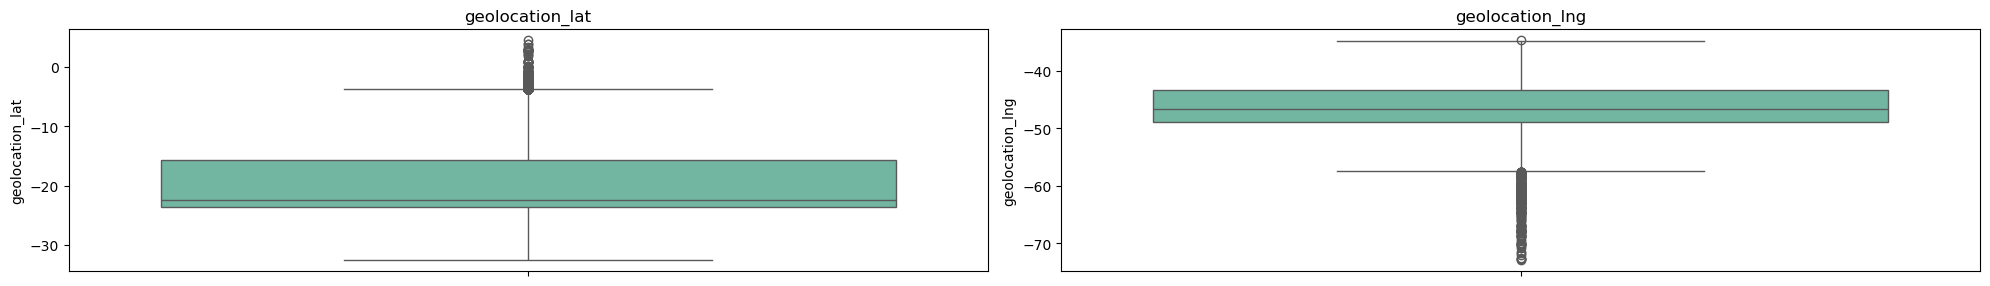

------------------
(19568, 5)


In [34]:
numberOutliers(geo_valid.select_dtypes('float64'))
print('------------------')
print(geo_valid.shape)

In [35]:
geolocation

,geolocation_zip_code_prefix,geolocation_state,geolocation_city,geolocation_lat,geolocation_lng
0,1001,SP,sao paulo,-23.550190,-46.634024
1,1002,SP,sao paulo,-23.548146,-46.634979
2,1003,SP,sao paulo,-23.548994,-46.635731
3,1004,SP,sao paulo,-23.549799,-46.634757
4,1005,SP,sao paulo,-23.549456,-46.636733
...,...,...,...,...,...
19580,99960,RS,charrua,-27.953722,-52.025511
19581,99965,RS,agua santa,-28.183372,-52.039850
19582,99970,RS,ciriaco,-28.343766,-51.874689
19583,99980,RS,david canabarro,-28.389129,-51.843836


In [36]:
#import folium package to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

In [37]:
lats = geolocation['geolocation_lat'].tolist()
lons = geolocation['geolocation_lng'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[-23.550190, -46.634024], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

##### Geolocation table cleanning summary:

* The primary key composed of the smallest geographical units (prefix + latitude + longitude) is not unique. Considering the inconsistent city names, text cleaning was performed on the city column, and 720,154 pieces of data were obtained.
* There are no missing values.
* The table only covers the geographical scope of Brazil. Abnormal coordinates were removed by restricting the latitude and longitude.

#### 3. Order Items Dataset

In [38]:
print(order_items.dtypes)
print('---------------')
keyValidation(order_items, 'order_id') # primary key validation

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object
---------------
Attention: The primary key is not unique.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000


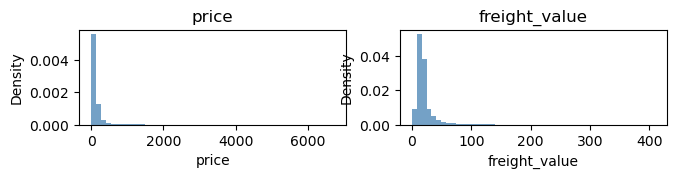

In [39]:
# item table numeric data distribution
items_number = order_items.select_dtypes('float64')
print(items_number.describe())
normalDistribution(items_number)

In [40]:
def upperBound(number_data):

    outliers = pd.DataFrame()

    for column in number_data.columns:
        # calculate quartiles
        Q1 = number_data[column].quantile(0.25)
        Q3 = number_data[column].quantile(0.75)
        IQR = Q3 - Q1    
        # define upper bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # print upper bound
        print(f'{column} 150: {upper_bound}')
        # find outliers
        upper_outliers = number_data[number_data[column] > upper_bound]
        outliers = pd.concat([outliers, upper_outliers], ignore_index = True)

    # concatenated outlier table contains duplicates
    outliers = outliers.drop_duplicates().reset_index(drop=True)
    
    return outliers

In [41]:
# find outliers of price and freight_value
items_outliers = upperBound(items_number).sort_values(by=['price','freight_value'], ascending=False)

price 150: 277.4
freight_value 150: 33.254999999999995


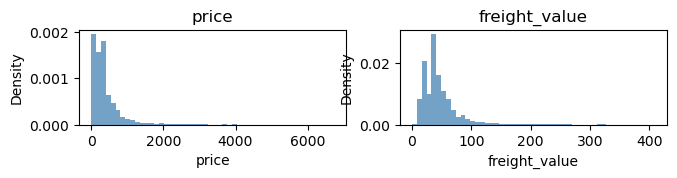

In [42]:
normalDistribution(items_outliers)

In [43]:
# items date type field outliers
print(dateOutliers(order_items, ['shipping_limit_date'])) # return empty table, means all are valid date format
print('\n')
print(order_items['shipping_limit_date'].describe())
print(f'\n')

# The last order date in the Orders table is 2018-10-18, which means there are dates outside reasonable date range
items_outliers = order_items[order_items['shipping_limit_date'] > '2018-10-31']

shipping_limit_date min: 2016-09-19 00:15:34
shipping_limit_date max: 2020-04-09 22:35:08
Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []


count                           112650
mean     2018-01-07 15:36:52.192685312
min                2016-09-19 00:15:34
25%         2017-09-20 20:57:27.500000
50%                2018-01-26 13:59:35
75%      2018-05-10 14:34:00.750000128
max                2020-04-09 22:35:08
Name: shipping_limit_date, dtype: object




In [36]:
# refer to order information for checking purchase date

# orders[orders['order_id'].isin(['13bdf405f961a6deec817d817f5c6624',
#                                 '9c94a4ea2f7876660fa6f1b59b69c8e6',
#                                 'c2bb89b5c1dd978d507284be78a04cb2'])] # orders purchased in 2017

# # change outliers by new values
# rows_to_change = [8643, 68516, 85729, 85730]
# values = [np.nan, # a cancled order 
#           pd.to_datetime('2017-03-20 19:23:22', format='%Y-%m-%d %H:%M:%S'), 
#           pd.to_datetime('2017-06-01 22:28:36', format='%Y-%m-%d %H:%M:%S'),
#           pd.to_datetime('2017-06-01 22:28:36', format='%Y-%m-%d %H:%M:%S')] 
# order_items.iloc[rows_to_change, 4] = values

In [44]:
# items table missing values
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [45]:
order_items.pivot_table(index='order_id',aggfunc='count').sort_values(by='order_item_id', ascending=False)

,freight_value,order_item_id,price,product_id,seller_id,shipping_limit_date
order_id,,,,,,
8272b63d03f5f79c56e9e4120aec44ef,21,21,21,21,21,21
1b15974a0141d54e36626dca3fdc731a,20,20,20,20,20,20
ab14fdcfbe524636d65ee38360e22ce8,20,20,20,20,20,20
9ef13efd6949e4573a18964dd1bbe7f5,15,15,15,15,15,15
428a2f660dc84138d969ccd69a0ab6d5,15,15,15,15,15,15
...,...,...,...,...,...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1,1,1,1,1,1
5a082b558a3798d3e36d93bfa8ca1eae,1,1,1,1,1,1
5a07264682e0b8fbb3f166edbbffc6e8,1,1,1,1,1,1


In [46]:
order_items[order_items['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef'].tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57313,8272b63d03f5f79c56e9e4120aec44ef,17,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57314,8272b63d03f5f79c56e9e4120aec44ef,18,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57315,8272b63d03f5f79c56e9e4120aec44ef,19,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57316,8272b63d03f5f79c56e9e4120aec44ef,20,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.8,6.57


##### Items table cleaning summary
1. The _order_items_ table has no duplicate values.
2. For numerical data, the distributions of both price and freight_value are significantly right - skewed, and there are no outliers. For time - type data, the format of shipping_limit_time is normal, and the extreme values are 2016 - 09 - 19 00:15:34 and 2020 - 04 - 09 22:35:08 respectively.
3. There are no missing values.
4. _product_id_ corresponds to the product category. When there are multiple products of the same category in an order, the product_id is the same. freight_value corresponds to the order freight. Attention should be paid to taking single values in later calculations.

#### 4. Orders Dataset

In [47]:
print(orders.dtypes) 
print('-----------------')
keyValidation(orders, 'order_id')

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
-----------------
0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Length: 99441, dtype: bool: No duplicate values found, the primary key is unique.


In [48]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [49]:
# outliers on date type data in order table
dateOutliers(orders, ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
                     'order_delivered_customer_date','order_estimated_delivery_date'])

order_purchase_timestamp min: 2016-09-04 21:15:19
order_purchase_timestamp max: 2018-10-17 17:30:18
order_approved_at min: 2016-09-15 12:16:38
order_approved_at max: 2018-09-03 17:40:06
order_delivered_carrier_date min: 2016-10-08 10:34:01
order_delivered_carrier_date max: 2018-09-11 19:48:28
order_delivered_customer_date min: 2016-10-11 13:46:32
order_delivered_customer_date max: 2018-10-17 13:22:46
order_estimated_delivery_date min: 2016-09-30 00:00:00
order_estimated_delivery_date max: 2018-11-12 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [50]:
# datetime outliers strongly related to order status
orders.pivot_table(index=['order_status'], aggfunc=lambda x: x.isna().sum()
).sort_values(   # count NaN number in each order status
    by='order_id', ascending=False)

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp
order_status,,,,,,,
approved,0,0,2,2,0,0,0
canceled,0,141,550,619,0,0,0
created,0,5,5,5,0,0,0
delivered,0,14,2,8,0,0,0
invoiced,0,0,314,314,0,0,0
processing,0,0,301,301,0,0,0
shipped,0,0,0,1107,0,0,0
unavailable,0,0,609,609,0,0,0


When an order is delivered, there shouldn't be missing values in any of date columns, but there are some edge cases to consider:
* Case 1: 14 missing (NaN) values in __approved time__
* Case 2: 2 missing values in __carrier delivering date__
* Case 3: 8 missing values in __customer recieving date__

All of these above which can be considered anomaly data - should be deleted

In [51]:
## Case 1. delivered but approved_time is null
approved = orders[(orders['order_status'] == 'delivered') & (orders['order_approved_at'].isna())]
approved

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [52]:
## Case 1. Fill in NA values: delivered & approved_time
new_values = orders.loc[approved.index.tolist(), 'order_purchase_timestamp'] + pd.Timedelta(days=1) 
### replace by purchase time + 1 day
orders.loc[approved.index.tolist(), 'order_approved_at'] = new_values
print(orders.loc[approved.index.tolist(), 'order_approved_at'])

5323    2017-02-19 14:40:00
16567   2017-02-19 12:45:31
19031   2017-02-19 13:29:47
22663   2017-02-19 16:48:35
23156   2017-02-18 13:05:55
26800   2017-01-20 12:48:08
38290   2017-02-20 01:28:47
39334   2017-02-19 11:04:19
48401   2017-01-20 22:26:59
61743   2017-02-18 17:21:55
63052   2017-02-19 15:52:27
67697   2017-02-19 22:49:19
72407   2017-02-18 15:53:27
84999   2017-02-19 17:15:03
Name: order_approved_at, dtype: datetime64[ns]


In [53]:
# Case 2. delivered & order_delivered_customer_date is null
customer = orders[(orders['order_status'] == 'delivered') & (orders['order_delivered_customer_date'].isna())]
customer

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


* 7 of 8 orders are delivered by carrier with no order delivered to customer, which may be considered logistic loss; 
* 1 order is 'delivered' status but no carrier delivering date which means system status error.

In [54]:
# Case 3. invoiced & order_delivered_customer_date is null
invoiced = orders[(orders['order_status'] == 'invoiced') & (orders['order_delivered_customer_date'].isna())]
invoiced

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20
...,...,...,...,...,...,...,...,...
98414,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,NaT,NaT,2017-12-18
98624,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,NaT,NaT,2018-06-05
98845,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaT,NaT,2017-12-15
99031,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,NaT,NaT,2018-08-17


In [55]:
invoiced.isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64

In [56]:
orders.pivot_table(index=['order_status'],aggfunc=lambda x: x.isna().sum()).sort_values(by='order_id', ascending=False)

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp
order_status,,,,,,,
approved,0,0,2,2,0,0,0
canceled,0,141,550,619,0,0,0
created,0,5,5,5,0,0,0
delivered,0,0,2,8,0,0,0
invoiced,0,0,314,314,0,0,0
processing,0,0,301,301,0,0,0
shipped,0,0,0,1107,0,0,0
unavailable,0,0,609,609,0,0,0


##### Orders Table Cleaning Summary:

* Transformed datetime data from object type to datetime type.
* The primary key `order_id` is unique and validated.
* 14 orders with 'approved' status had approving time missing, and were replaced by purchased datetime plus 1 day; 8 orders with 'delivered' status had logistic issue, so, we keep one eye on their customer reviews.
1159 orders with 'canceled','unavailable' status can be considered system or customer issue that caused a bunch of NaN values which we keep for checking customer reviews.
* 314 orders with 'invoiced' status with no carrier, no customer delivering date

#### 5. Order Payments Dataset

In [57]:
print(order_payments.shape)
print(order_payments.dtypes)
print('\n')
print(order_payments.describe())
print('\n')
keyValidation(order_payments, ['order_id','payment_installments','payment_sequential'])

(103886, 5)
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


0         False
1         False
2         False
3         False
4         False
          ...  
103881    False
103882    False
103883    False
103884    False
103885    False
Length: 103886, dtype: bool: No duplicate values found, the primary

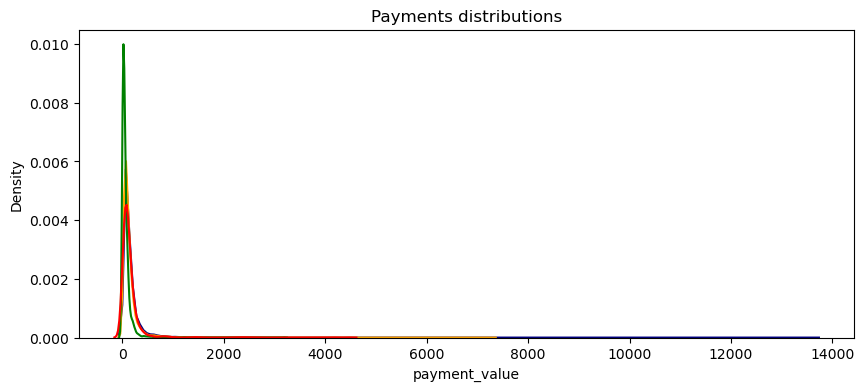

In [58]:
plt.figure(figsize=(10,4))
plt.title("Payments distributions")
p1 = sns.kdeplot(order_payments[order_payments['payment_type'] == 'credit_card']['payment_value'], color="navy", label='Credit card')
p2 = sns.kdeplot(order_payments[order_payments['payment_type'] == 'boleto']['payment_value'], color="orange", label='Boleto')
p3 = sns.kdeplot(order_payments[order_payments['payment_type'] == 'voucher']['payment_value'], color="green", label='Voucher')
p4 = sns.kdeplot(order_payments[order_payments['payment_type'] == 'debit_card']['payment_value'], color="red", label='Debit card')

In [59]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

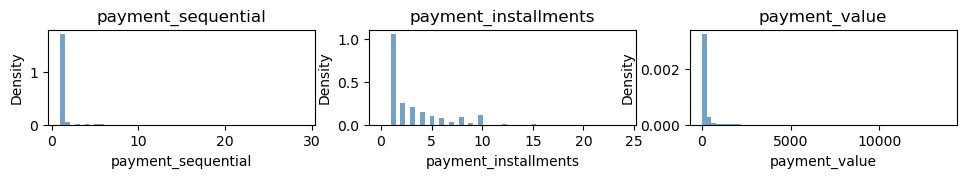

In [60]:
normalDistribution(order_payments.select_dtypes('number'))

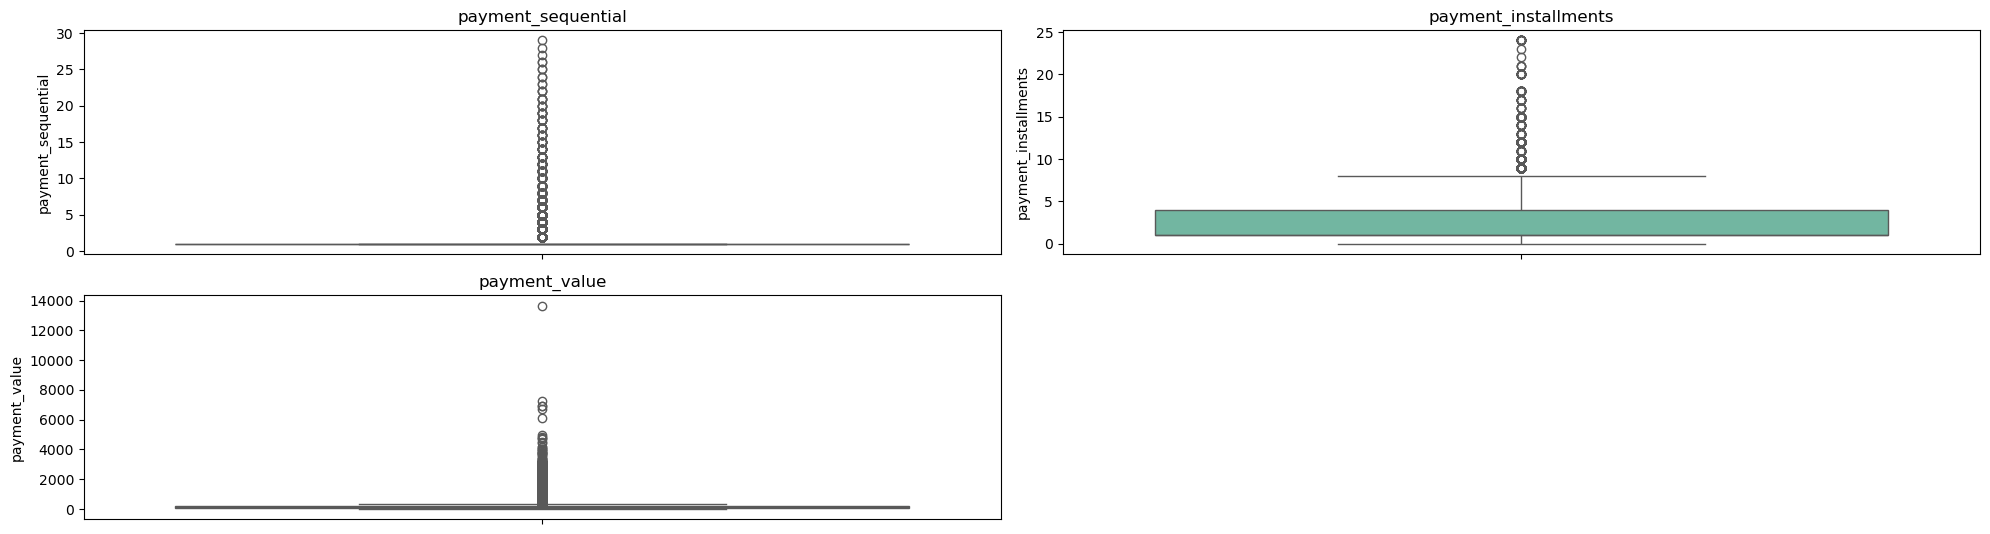

In [61]:
numberOutliers(order_payments.select_dtypes('number'))

In [62]:
order_payments[order_payments['payment_value'] > 10000]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08


1. Most customer payment installments are less than 5 times, while the highest is 24 times (2 years).
2. We also observe a payment value point is extremely high which may be an outlier, by refering to items table it can be excluded from outliers.

In [63]:
categoryOutliers(order_payments, order_payments.columns, 'payment_type') # pivot values are nunique values 

,order_id,payment_installments,payment_sequential,payment_value
payment_type,,,,
credit_card,76505,24,3,25499
boleto,19784,1,2,10541
voucher,3866,1,29,3539
debit_card,1528,1,3,1383
not_defined,3,1,1,1


In [64]:
order_payments[order_payments['payment_type']== 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [114]:
payments_outliers = ['4637ca194b6387e2d538dc89b124b0ee',
                    '00b1cb0320190ca0daa2c88b35206009',
                    'c8c528189310eaa44a745b8d9d26908b']

                               order_id                       customer_id  \
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
39919  4637ca194b6387e2d538dc89b124b0ee  a73c1f73f5772cf801434bf984b0b1a7   
40235  c8c528189310eaa44a745b8d9d26908b  197a2a6a77da93f678ea0d379f21da0a   

      order_status order_purchase_timestamp order_approved_at  \
1130      canceled      2018-08-28 15:26:39               NaT   
39919     canceled      2018-09-03 14:14:25               NaT   
40235     canceled      2018-08-28 20:05:14               NaT   

      order_delivered_carrier_date order_delivered_customer_date  \
1130                           NaT                           NaT   
39919                          NaT                           NaT   
40235                          NaT                           NaT   

      order_estimated_delivery_date  
1130                     2018-09-12  
39919                    2018-09-10  
40235                    2018-09-11  


In [115]:
order_items[order_items['order_id'].isin(payments_outliers)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [116]:
orders[orders['order_id'].isin(payments_outliers)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
39919,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaT,NaT,NaT,2018-09-10
40235,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaT,NaT,NaT,2018-09-11


As observed, the 3 orders with payment type 'not defined' are canceled orders. We can excluded them from outliers.

##### Payments table cleaning summary:

* Fact table with a combination of order id, payment installment, payment sequential as the primary key. Unique key validated.
* No missing values.
* Outliers (such as price_value and payment_type) can be found in the order table with corresponding consistent data, so they are excluded from the outlier category. The payment table has no outliers.

#### 6. Order Reviews Dataset

In [66]:
print(keyValidation(order_reviews,'review_id'))

Attention: The primary key is not unique.
                              review_id                          order_id  \
3317   3242cc306a9218d0377831e175d62fbf  9c5bfba7de6a4abbb6ba0baab78d1622   
5719   308316408775d1600dad81bd3184556d  3fe4dbcdb046a475dbf25463c1ca78bd   
7213   8ee90ac383cf825bb7f4756130d4e74a  75d5d3d16567a27eefc5752aeb063072   
7805   d433c252647c51309432ca0b763f969b  191abde9c3bf77d1ce67d100d8db6d15   
9013   03a6a25db577d0689440933055111897  3fde8b7313af6b37b84b5c7594d7add0   
...                                 ...                               ...   
99108  2c6c08892b83ba4c1be33037c2842294  42ae1967f68c90bb325783ac55d761ce   
99124  6ec93e77f444e0b1703740a69122e35d  e1fdc6e9d1ca132377e862593a7c0bd4   
99164  2afe63a67dfd99b3038f568fb47ee761  c5334d330e36d2a810a7a13c72e135ee   
99167  017808d29fd1f942d97e50184dfb4c13  b1461c8882153b5fe68307c46a506e39   
99178  44d1e9165ec54b1d89d33594856af859  a7dbcf5043158d6fa72859eead2f3d10   

       review_score review_commen

In [67]:
print(order_reviews.shape)
print(order_reviews.describe())
print(order_reviews.dtypes)

(99224, 7)
       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object


In [68]:
# sanity check: how many reviews made in each order
order_reviews.groupby(by=['order_id'], as_index=False)['review_id'].count().sort_values(by=['review_id'], ascending=False)

,order_id,review_id
54489,8e17072ec97ce29f0e1f111e598b0c85,3
77319,c88b1d1b157a9999ce368f218a407141,3
1455,03c939fd7fd3b38f8485a0f95798f1f6,3
86232,df56136b8031ecd28e200bb18e6ddb2e,3
15722,29062384ce4975f78aeba6a496510386,2
...,...,...
32987,559609410c90dc1792181a5f260a6600,1
32986,5595480d373b37e5738fc085dd9bcb8e,1
32985,559115c14f48d999adcc027b4a702c8b,1
32984,5590b14b260d2f61b2db5efb8d4a4601,1


In [69]:
# an order example can have multiple reviews
order_reviews[order_reviews['order_id']=='8e17072ec97ce29f0e1f111e598b0c85']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
44694,67c2557eb0bd72e3ece1e03477c9dff5,8e17072ec97ce29f0e1f111e598b0c85,1,NaN,Entregou o produto errado.,2018-04-07 00:00:00,2018-04-08 22:48:27
64510,2d6ac45f859465b5c185274a1c929637,8e17072ec97ce29f0e1f111e598b0c85,1,NaN,Comprei 3 unidades do produto vieram 2 unidades que não corresponde com o que comprei. Devido a ...,2018-04-07 00:00:00,2018-04-07 21:13:05
92300,6e4c4086d9611ae4cc0cc65a262751fe,8e17072ec97ce29f0e1f111e598b0c85,1,NaN,"Embora tenha entregue dentro do prazo, não enviou o produto que comprei.",2018-04-14 00:00:00,2018-04-16 11:37:31


In [70]:
# why one review ID corresponds to multiple order IDs
order_reviews.groupby(by=['review_id'], as_index=False)['order_id'].count().sort_values(by=['order_id'], ascending=False)

,review_id,order_id
85346,ddc52555ca27b0fe67d5255147682d2d,3
17423,2d6ac45f859465b5c185274a1c929637,3
40583,69a1068c3128a14994e3e422e4539e04,3
12172,1fb4ddc969e6bea80e38deec00393a6f,3
50493,832acec9bbf4efe65c3fb6423d8b4ed7,3
...,...,...
32923,55e786108c25c7189556f979d36d21e2,1
32922,55e75349772296ce03638d94f56a2551,1
32921,55e7223cc9cf2266d2b5c94587727239,1
32920,55e718e1ad1ab74f486f8f1339029ad1,1


In [71]:
# check relationship between review id and order id
reviews_duplicated = pd.DataFrame(order_reviews.groupby('review_id')['order_id'].count())

# filter out duplicates: one review_id --> multiple order_id
reviews_duplicated[reviews_duplicated['order_id'] >= 2].sort_values(by=['order_id'],ascending=False)

,order_id
review_id,
4548534449b1f572e357211b90724f1b,3
2d6ac45f859465b5c185274a1c929637,3
1fb4ddc969e6bea80e38deec00393a6f,3
4d0e6dd087008d1f992d25ef6e1f619f,3
c444278834184f72b1484dfe47de7f97,3
...,...
5bdf704ce1edc91bc6c73abede903d1c,2
5c4bd938f98283c5d7145a9d25a89c3e,2
5c99f6ff0f883ea3b283853720266109,2


In [73]:
order_reviews[order_reviews['review_id'] == '4548534449b1f572e357211b90724f1b']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
58393,4548534449b1f572e357211b90724f1b,cfdfd7862e532c4ec1ed1c6a1b56d320,1,NaN,quero devolver o produto comprei um veio outro;;;\r\nquero meu dinheiro de volta.,2018-08-18 00:00:00,2018-08-19 00:39:54
92768,4548534449b1f572e357211b90724f1b,a2ac6dad85cf8af5b0afb510a240fe8c,1,NaN,quero devolver o produto comprei um veio outro;;;\r\nquero meu dinheiro de volta.,2018-08-18 00:00:00,2018-08-19 00:39:54
95402,4548534449b1f572e357211b90724f1b,73a8ed1078e1d475d2b1fb7216a52e1a,1,NaN,quero devolver o produto comprei um veio outro;;;\r\nquero meu dinheiro de volta.,2018-08-18 00:00:00,2018-08-19 00:39:54


In [74]:
order_reviews[order_reviews['review_id']=='308316408775d1600dad81bd3184556d'] # repeated reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4545,308316408775d1600dad81bd3184556d,27e5ed2ecefbe0bcc9ae0c9b26b763c3,5,NaN,"Ajudem a rastrear uma das 3 prateleiras que faltou, só chegaram 2 delas...",2017-09-07 00:00:00,2017-09-11 09:58:09
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,"Ajudem a rastrear uma das 3 prateleiras que faltou, só chegaram 2 delas...",2017-09-07 00:00:00,2017-09-11 09:58:09
53661,308316408775d1600dad81bd3184556d,8b3c2785144e72ccba9b0213f0f1cd1e,5,NaN,"Ajudem a rastrear uma das 3 prateleiras que faltou, só chegaram 2 delas...",2017-09-07 00:00:00,2017-09-11 09:58:09


In [75]:
# take these order_ids 
lst_order_ids = [
    '27e5ed2ecefbe0bcc9ae0c9b26b763c3', # orders with repeated review ids 
    '3fe4dbcdb046a475dbf25463c1ca78bd',
    '8b3c2785144e72ccba9b0213f0f1cd1e']

orders[orders['order_id'].isin(lst_order_ids)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3804,3fe4dbcdb046a475dbf25463c1ca78bd,e17387227a12c3cac59fc44523d162e5,delivered,2017-08-30 06:22:58,2017-08-30 07:00:08,2017-08-30 20:43:45,2017-09-06 18:42:36,2017-09-26
14178,8b3c2785144e72ccba9b0213f0f1cd1e,e6138dce24962a66623898c89db41ef7,delivered,2017-08-30 06:22:57,2017-08-30 07:00:05,2017-08-30 20:43:45,2017-09-06 20:27:43,2017-09-26
55653,27e5ed2ecefbe0bcc9ae0c9b26b763c3,9962a28bb74e0754415433c3ddc14b2f,delivered,2017-08-30 06:22:58,2017-08-30 07:00:06,2017-08-30 20:43:45,2017-09-11 21:06:49,2017-09-26


In [76]:
order_items[order_items['order_id'].isin(lst_order_ids)] # order items with repeated review ids

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
17419,27e5ed2ecefbe0bcc9ae0c9b26b763c3,1,8ad5422c2f13436a172cbdd5f2faa00e,d91fb3b7d041e83b64a00a3edfb37e4f,2017-09-05 07:00:06,35.9,16.11
28060,3fe4dbcdb046a475dbf25463c1ca78bd,1,8ad5422c2f13436a172cbdd5f2faa00e,d91fb3b7d041e83b64a00a3edfb37e4f,2017-09-05 07:00:08,35.9,16.11
61093,8b3c2785144e72ccba9b0213f0f1cd1e,1,8ad5422c2f13436a172cbdd5f2faa00e,d91fb3b7d041e83b64a00a3edfb37e4f,2017-09-05 07:00:05,35.9,16.11


In [77]:
orders[orders['order_id'].isin(lst_order_ids)]['customer_id'].to_list()

['e17387227a12c3cac59fc44523d162e5',
 'e6138dce24962a66623898c89db41ef7',
 '9962a28bb74e0754415433c3ddc14b2f']

In [78]:
customerids = ['e17387227a12c3cac59fc44523d162e5', # repeated review ids correspond to the same unique customer
               'e6138dce24962a66623898c89db41ef7',
               '9962a28bb74e0754415433c3ddc14b2f']
lst_customer_ids = orders[orders['order_id'].isin(lst_order_ids)]['customer_id'].to_list()

customers[customers['customer_id'].isin(customerids)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
13975,e6138dce24962a66623898c89db41ef7,46958f708ade6b6a88b2e5aca1e66de5,85640,ampere,PR
75190,e17387227a12c3cac59fc44523d162e5,46958f708ade6b6a88b2e5aca1e66de5,85640,ampere,PR
76997,9962a28bb74e0754415433c3ddc14b2f,46958f708ade6b6a88b2e5aca1e66de5,85640,ampere,PR


In [79]:
lst_customer_ids

['e17387227a12c3cac59fc44523d162e5',
 'e6138dce24962a66623898c89db41ef7',
 '9962a28bb74e0754415433c3ddc14b2f']

An order can have multiple reviews, because customers review by each item purchased. Meanwhile, one review id may correspond to multiple order ids, but the one who reviews is the same unique customer. The mapping relationship between the two ids is many to many. **Thus, the review table's primary key combines review_id and order_id.**

In [80]:
# second duplicate check 
keyValidation(order_reviews, ['review_id', 'order_id'])

0        False
1        False
2        False
3        False
4        False
         ...  
99219    False
99220    False
99221    False
99222    False
99223    False
Length: 99224, dtype: bool: No duplicate values found, the primary key is unique.


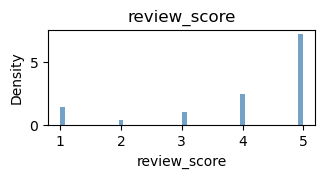

In [81]:
# review table numeric data distribution
normalDistribution(order_reviews.select_dtypes('number'))

In [82]:
# datetime outliers
dateOutliers(order_reviews,['review_creation_date','review_answer_timestamp'])

review_creation_date min: 2016-10-02 00:00:00
review_creation_date max: 2018-08-31 00:00:00
review_answer_timestamp min: 2016-10-07 18:32:28
review_answer_timestamp max: 2018-10-29 12:27:35


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Pá...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super recomendo essa loja!",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


##### _Reviews_ Table Cleaning Summary:

1. Fact table with unique primary key.
2. Subject columns has no NaN value, which includes review_id, order_id, review_score, and date columns
3. Transformed false date columns type from object to datetime data.  

#### 7. Products Dataset

In [83]:
print(products.shape)
print(products.describe())
print(products.dtypes)
keyValidation(products, 'product_id')

(32951, 9)
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000   

In [84]:
# change data type (object to float)
products[['product_name_lenght','product_description_lenght','product_photos_qty']]= products[
['product_name_lenght','product_description_lenght','product_photos_qty']].astype(dtype='float64')

In [85]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [86]:
#### inspect the null values
products[products.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [87]:
#### fill NA values with product name:
mapping = {
    'product_category_name': 'others',
    #### fill NA values with means of that field/column
    'product_name_lenght': products['product_name_lenght'].mean(),
    'product_description_lenght': products['product_description_lenght'].mean(),
    'product_photos_qty': products['product_photos_qty'].mean(),
    'product_weight_g': products['product_weight_g'].mean(),
    'product_length_cm': products['product_length_cm'].mean(),
    'product_height_cm': products['product_height_cm'].mean(),
    'product_width_cm': products['product_width_cm'].mean()
}

products.fillna(mapping, inplace=True)
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


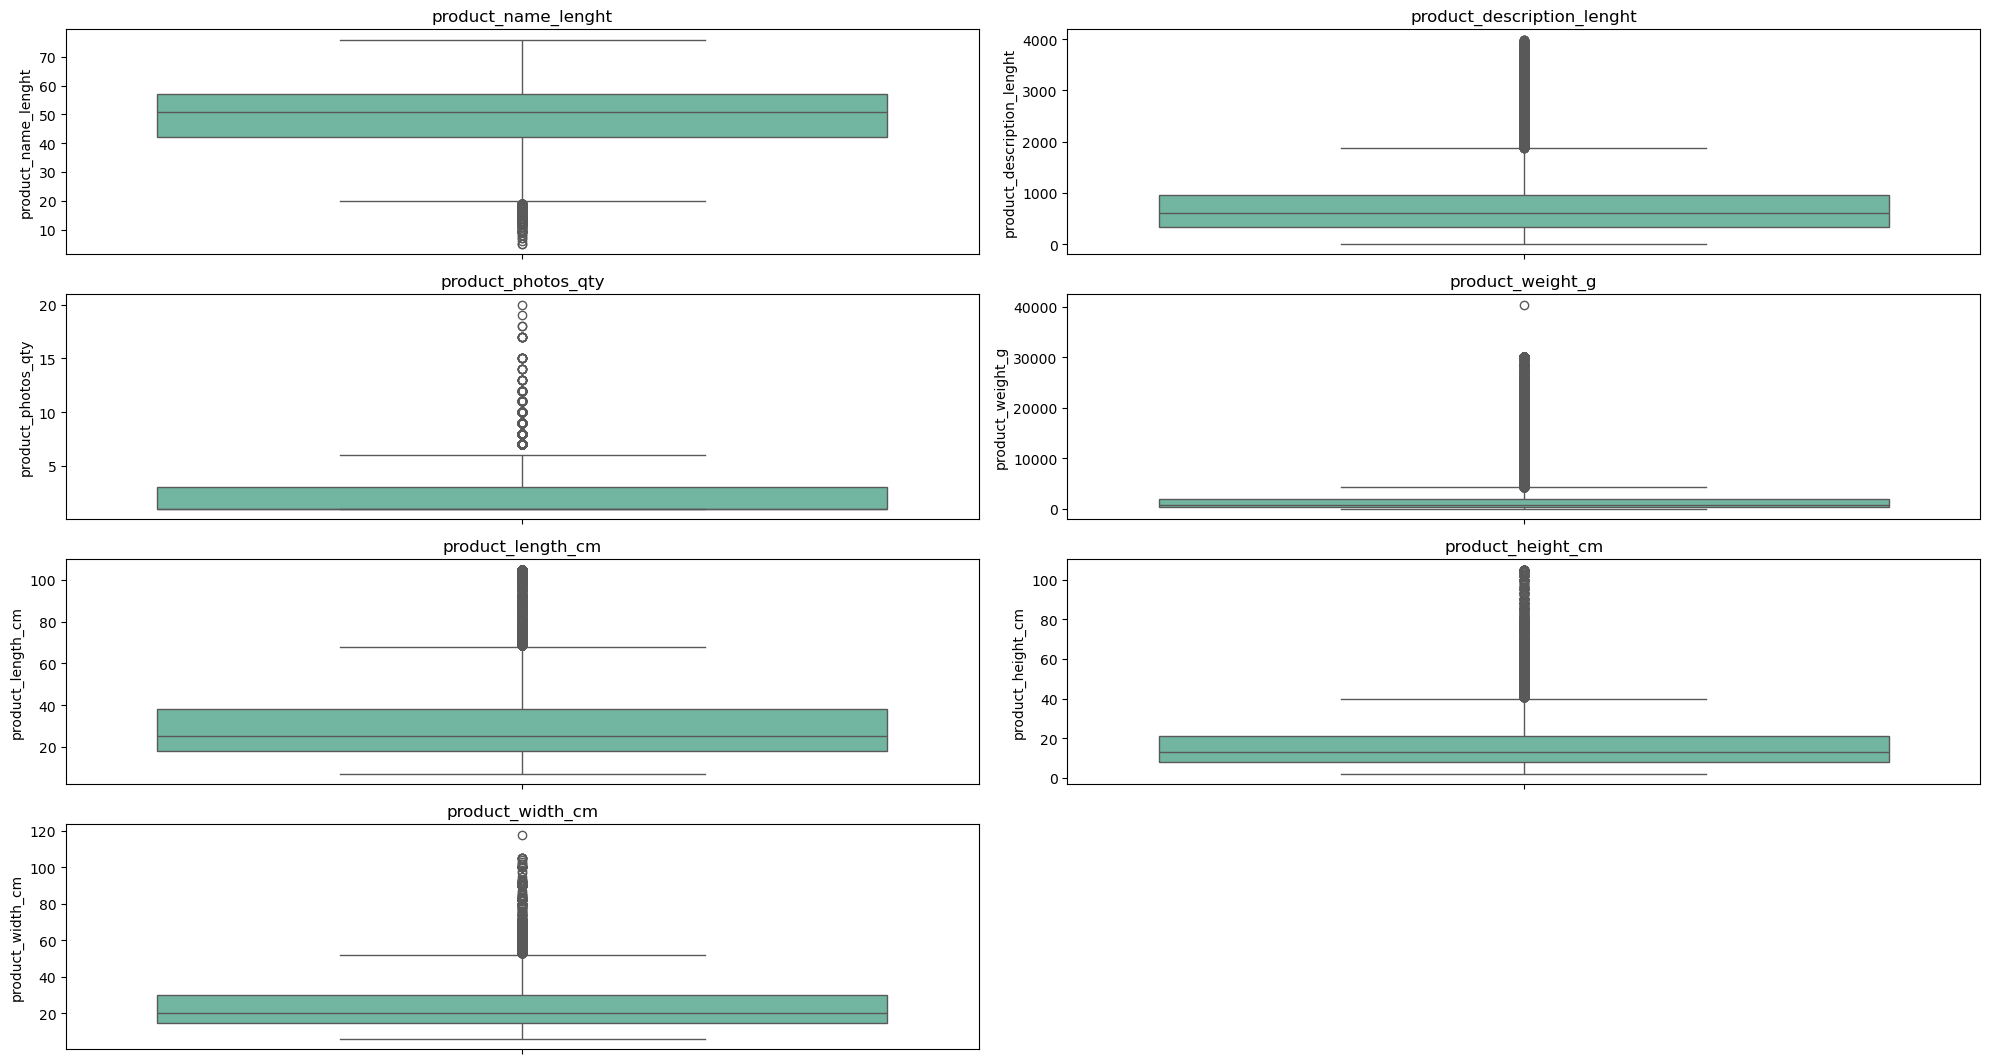

In [88]:
# check products outliers
numberOutliers(products.select_dtypes('number'))

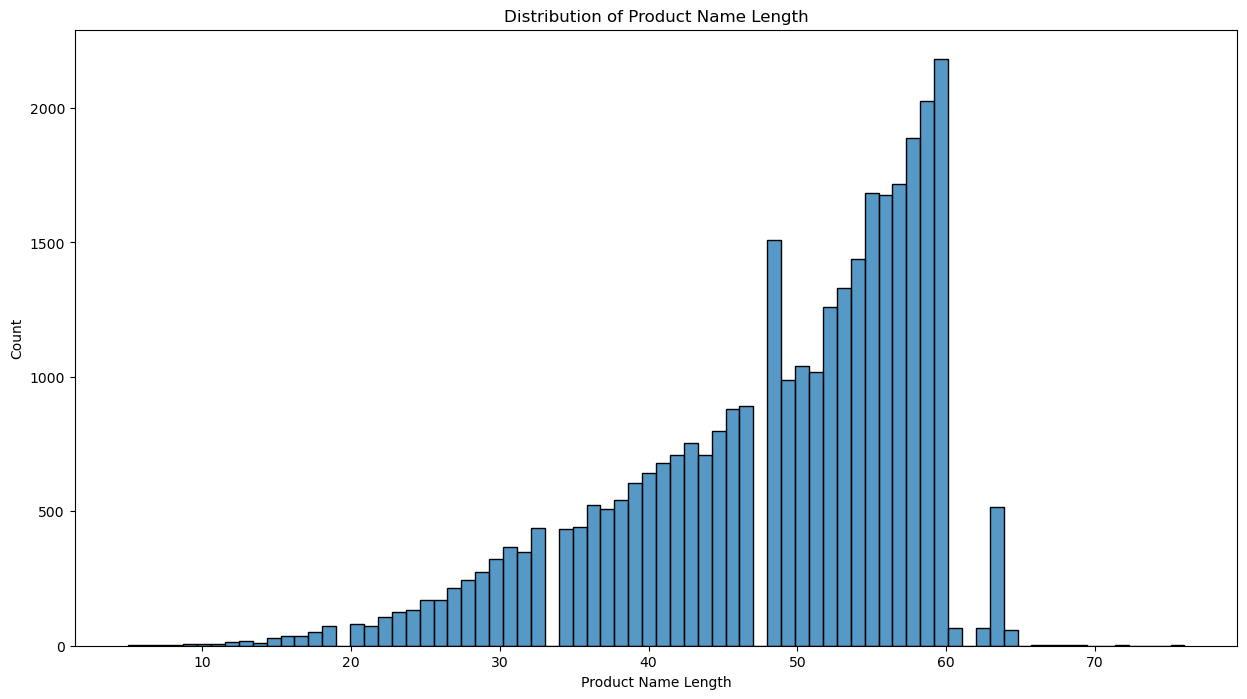

In [89]:
# plotting the distribution of product name length
plt.figure(figsize=(15,8))
sns.histplot(x='product_name_lenght', data=products)
plt.title('Distribution of Product Name Length')
plt.xlabel('Product Name Length')
plt.show()

##### Products table cleaning summary:

* Dimensional table with primary key 'product_id' validated
* Transformed number data type from object to float
* Filled string type missing values (add new category 'other'), number type missing values(mean values)
* We may observe outliers beyond the upper bounds of the boxplot in the graph above. Since all outliers points are continuously distributed, I tend not to consider them as true outliers.

#### 8. Sellers Dataset

In [90]:
print(sellers.shape)
print('--------------------------------')
print(sellers.describe())
print('--------------------------------')
keyValidation(sellers, ['seller_id'])

(3095, 4)
--------------------------------
       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000
--------------------------------
0       False
1       False
2       False
3       False
4       False
        ...  
3090    False
3091    False
3092    False
3093    False
3094    False
Length: 3095, dtype: bool: No duplicate values found, the primary key is unique.


In [91]:
# clean city text 
sellers['seller_city'] = sellers['seller_city'].apply(lambda x: clean_text(x))
categoryOutliers(sellers,
                 ['seller_id','seller_zip_code_prefix','seller_city'],
                 ['seller_city','seller_zip_code_prefix'])

seller_id
seller_city      seller_zip_code_prefix           
ibitinga         14940                          49
porto ferreira   13660                           9
pedreira         13920                           9
birigui          16200                           9
maringa          87050                           8
...                                            ...
lages            88504                           1
                 88501                           1
juzeiro do norte 63020                           1
jussara          87230                           1
xaxim            89825                           1

[2279 rows x 1 columns]

In [92]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


#### 9. Product Category Name Translation Dataset

In [93]:
category_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


#### Merging the Datasets

tables: 
* customers = pd.read_csv('olist_customers_dataset.csv')
* geolocation = pd.read_csv('olist_geolocation_dataset.csv')
* order_items = pd.read_csv('olist_order_items_dataset.csv')
* order_payments = pd.read_csv('olist_order_payments_dataset.csv')
* order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
* orders = pd.read_csv('olist_orders_dataset.csv')
* products = pd.read_csv('olist_products_dataset.csv')
* sellers = pd.read_csv('olist_sellers_dataset.csv')
* category_name = pd.read_csv('product_category_name_translation.csv')

<img src="table_relation.png" width="800">

In [94]:
data = pd.merge(orders, order_payments, on='order_id', how='inner')
data = data.merge(order_reviews, on='order_id', how='left')
data = data.merge(customers, on='customer_id', how='inner')
data = data.merge(order_items, on='order_id', how='inner')
data = data.merge(products, on='product_id', how='inner')
data = data.merge(category_name, on='product_category_name', how='inner')
data = data.merge(sellers, on='seller_id', how='inner')
data = data.merge(geolocation, left_on='customer_zip_code_prefix', 
              right_on='geolocation_zip_code_prefix', how='inner')

data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_state,geolocation_city,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,3149,SP,sao paulo,-23.576983,-46.587161
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,3149,SP,sao paulo,-23.576983,-46.587161
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,3149,SP,sao paulo,-23.576983,-46.587161
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570,belo horizonte,SP,47813,BA,barreiras,-12.177924,-44.660711
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840,guariba,SP,75265,GO,vianopolis,-16.745150,-48.514783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [136]:
data = data.drop_duplicates()
data.to_csv('dataset_olist_merged.csv', index=False)

##### Suggested: merge datasets step-by-step and check table keys

In [95]:
# merging the datasets
df1 = pd.merge(orders, order_payments, on='order_id', how='left')
print(df1['order_id'].nunique())
print(df1.shape)
#print(df1.isnull().sum())
df1.head()

99441
(103887, 12)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


In [96]:
df2 = df1.merge(order_reviews, on='order_id', how='left')
print(df2['order_id'].nunique())
print(df2['customer_id'].nunique())
print(df2.shape)
# print(df2.isnull().sum())
df2.head()

99441
99441
(104478, 18)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58


In [97]:
df3 = df2.merge(customers, on='customer_id', how='inner')
unique = df3['order_id'].nunique()
print(f'Number of unique order_ids: {unique}')
df3.head()

Number of unique order_ids: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [98]:
df4 = df3.merge(order_items, on='order_id', how='inner')
unique_order = df4['order_id'].nunique()
unique_customer = df4['customer_id'].nunique()

print(f'Number of unique orders: {unique_order}')
print(f'Number of unique customers: {unique_customer}')

df4.head()

Number of unique orders: 98666
Number of unique customers: 98666


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [99]:
df5 = df4.merge(products, on='product_id', how='inner')
unique_order = df5['order_id'].nunique()
unique_customer = df5['customer_id'].nunique()
unique_product = df5['product_id'].nunique()
unique_seller = df5['seller_id'].nunique()

print(f'Unique order ID: {unique_order}')
print(f'Unique customer ID: {unique_customer}')
print(f'Unique product ID: {unique_product}')
print(f'Unique seller ID: {unique_seller}')

df5.head()

Unique order ID: 98666
Unique customer ID: 98666
Unique product ID: 32951
Unique seller ID: 3095


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [100]:
#### fetch customer zip_code:
df6 = df5.merge(geolocation, left_on='customer_zip_code_prefix', 
              right_on='geolocation_zip_code_prefix', how='inner')
df6.rename(columns={
    "geolocation_lat": "customer_geolocation_lat", 
    "geolocation_lng": "customer_geolocation_lng"},
inplace=True)

print(df6['order_id'].nunique())
print(df6.shape)
df6.head()

98392
(122044, 41)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_state,geolocation_city,customer_geolocation_lat,customer_geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,47813,BA,barreiras,-12.177924,-44.660711
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,75265,GO,vianopolis,-16.745150,-48.514783


In [101]:
df7 = df6.merge(sellers, on='seller_id', how='inner')

unique_order = df7['order_id'].nunique()
unique_customer = df7['customer_id'].nunique()
unique_product = df7['product_id'].nunique()
unique_seller = df7['seller_id'].nunique()

print(f'Unique order ID: {unique_order}')
print(f'Unique customer ID: {unique_customer}')
print(f'Unique product ID: {unique_product}')
print(f'Unique seller ID: {unique_seller}')

df7.head()

Unique order ID: 98392
Unique customer ID: 98392
Unique product ID: 32904
Unique seller ID: 3095


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_state,geolocation_city,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,47813,BA,barreiras,-12.177924,-44.660711,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,75265,GO,vianopolis,-16.745150,-48.514783,14840,guariba,SP


In [102]:
geolocation_seller = geolocation[['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng']]
geolocation_seller

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19580,99960,-27.953722,-52.025511
19581,99965,-28.183372,-52.039850
19582,99970,-28.343766,-51.874689
19583,99980,-28.389129,-51.843836


In [103]:
df8 = df7.merge(geolocation_seller, left_on='seller_zip_code_prefix', 
              right_on='geolocation_zip_code_prefix', how='inner')

df8.rename(columns={
    "geolocation_lat": "seller_geolocation_lat", 
    "geolocation_lng": "seller_geolocation_lng"},
inplace=True)

print(df8['order_id'].nunique())
print(df8['customer_id'].nunique())
print(df8['seller_id'].nunique())
df8

98177
98177
3088


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix_x,geolocation_state,geolocation_city,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_y,seller_geolocation_lat,seller_geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,47813,BA,barreiras,-12.177924,-44.660711,31570,belo horizonte,SP,31570,-19.807681,-43.980427
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,75265,GO,vianopolis,-16.745150,-48.514783,14840,guariba,SP,14840,-21.363502,-48.229601


In [104]:
df = df8.merge(category_name, on='product_category_name', how='inner')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix_x,geolocation_state,geolocation_city,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_y,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,47813,BA,barreiras,-12.177924,-44.660711,31570,belo horizonte,SP,31570,-19.807681,-43.980427,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,75265,GO,viano

In [105]:
unique_order = df['order_id'].nunique()
unique_customer = df['customer_id'].nunique()
unique_product = df['product_id'].nunique()
unique_seller = df['seller_id'].nunique()

print(f'Unique order ID: {unique_order}')
print(f'Unique customer ID: {unique_customer}')
print(f'Unique product ID: {unique_product}')
print(f'Unique seller ID: {unique_seller}')

Unique order ID: 96774
Unique customer ID: 96774
Unique product ID: 32220
Unique seller ID: 3026


In [106]:
df[df.duplicated(['order_id'])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix_x,geolocation_state,geolocation_city,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_y,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238,housewares
11,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,1.0,credit_card,1.0,8.34,abc5655186d40772bd6e410420e6a3ed,5.0,NaN,NaN,2017-08-17,2017-08-18 01:47:32,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,1,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,2017-08-11 12:05:32,149.99,19.77,moveis_escritorio,45.0,527.0,1.0,9750.0,42.0,41.0,42.0,18075,SP,sorocaba,-23.474030,-47.467397,8577,itaquaquecetuba,SP,8577,-23.486111,-46.366721,office_furniture
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,1.0,credit_card,1.0,259.06,15898b543726a832d4137fbef5d1d00e,1.0,NaN,Aguardando retorno da loja,2017-05-30,2017-05-30 23:13:47,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ,2,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,30.53,ferramentas_jardim,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,20780,RJ,rio de janeiro,-22.896463,-43.272172,29156,cariacica,ES,29156,-20.278513,-40.411675,garden_tools
23,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23,3.0,voucher,1.0,24.86,219cf59cf889bc85babbd1cd1fe30f2d,4.0,NaN,NaN,2017-11-09,2017-11-10 01:06:29,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,1,c35498fbb4358837ae16850f50c3fd22,70a12e78e608ac31179aea7f8422044b,2017-11-01 16:07:35,76.00,16.97,telefonia,59.0,973.0,1.0,325.0,19.0,8.0,22.0,44024,BA,feira de santana,-12.244274,-38.979613,12327,jacarei,SP,12327,-23.302318

In [107]:
df[df.duplicated(['customer_id'])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix_x,geolocation_state,geolocation_city,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_y,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238,housewares
11,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,1.0,credit_card,1.0,8.34,abc5655186d40772bd6e410420e6a3ed,5.0,NaN,NaN,2017-08-17,2017-08-18 01:47:32,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,1,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,2017-08-11 12:05:32,149.99,19.77,moveis_escritorio,45.0,527.0,1.0,9750.0,42.0,41.0,42.0,18075,SP,sorocaba,-23.474030,-47.467397,8577,itaquaquecetuba,SP,8577,-23.486111,-46.366721,office_furniture
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,1.0,credit_card,1.0,259.06,15898b543726a832d4137fbef5d1d00e,1.0,NaN,Aguardando retorno da loja,2017-05-30,2017-05-30 23:13:47,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ,2,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,30.53,ferramentas_jardim,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,20780,RJ,rio de janeiro,-22.896463,-43.272172,29156,cariacica,ES,29156,-20.278513,-40.411675,garden_tools
23,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23,3.0,voucher,1.0,24.86,219cf59cf889bc85babbd1cd1fe30f2d,4.0,NaN,NaN,2017-11-09,2017-11-10 01:06:29,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,1,c35498fbb4358837ae16850f50c3fd22,70a12e78e608ac31179aea7f8422044b,2017-11-01 16:07:35,76.00,16.97,telefonia,59.0,973.0,1.0,325.0,19.0,8.0,22.0,44024,BA,feira de santana,-12.244274,-38.979613,12327,jacarei,SP,12327,-23.302318

In [108]:
df[df['customer_id'] == '9ef432eb6251297304e76186b10a928d']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix_x,geolocation_state,geolocation_city,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_y,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,9350,-23.680729,-46.444238,housewares


In [109]:
# dropping duplicate values
df = df.drop_duplicates()

In [110]:
df = df.drop(['geolocation_zip_code_prefix_x','geolocation_zip_code_prefix_y'], axis=1)
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_state,geolocation_city,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,-23.680729,-46.444238,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,-23.680729,-46.444238,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,SP,sao paulo,-23.576983,-46.587161,9350,maua,SP,-23.680729,-46.444238,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,BA,barreiras,-12.177924,-44.660711,31570,belo horizonte,SP,-19.807681,-43.980427,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,GO,vianopolis,-16.745150,-48.514783,14840,guariba,SP,-21.363502,-48.229601,auto
...,...,...,...,...,...,...,...,...,

In [111]:
df.to_csv('dataset_olist_merged.csv', index=False)